## HELLO! This is the model that I built for predicing customer churn using Logestic regression

<strong>Our aim here is to predict wheather a customer will leave a service or not after analysing the customer's history and demographics.</strong>

First let's import all the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics

<strong>Let's load our data</strong>

In [2]:
data = pd.read_csv('C:\\Users\\Eyosi\\Downloads\\archive\\Churn_Modelling.csv')

<strong>Let's take a look what our data looks like</strong>

In [3]:
data.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

<strong>Let's see what kind of information our data has</strong>

In [4]:
data.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

## Let's preprocess our data

<strong>Let's drop some columns that are unnecessary</strong>

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Let's Encode categorical variables

In [6]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

Let's Split the data into features (X) and target variable (y)

In [7]:
X = data.drop('Exited', axis=1)
y = data['Exited']

<strong>Let's spit the data</strong>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<strong>Let's see the class distribution </strong>

<Axes: xlabel='Exited'>

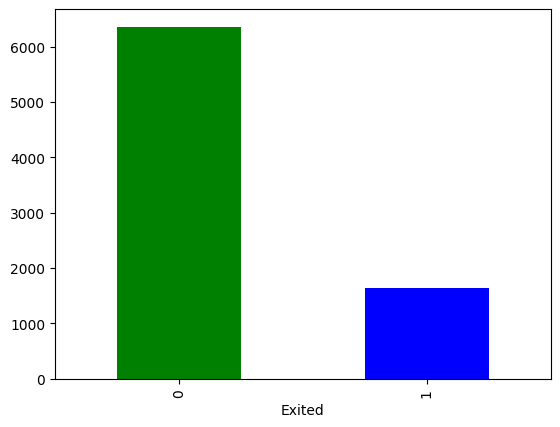

In [9]:
y_train.value_counts().plot.bar(color=['green', 'blue'])

<strong>As we can see here , the dataset is imbalanced. We will use more complex classification models starting from random forest</strong>

In [10]:
# Tuned random forest parameters
best_params_no_weight = {'bootstrap': True,
                         'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

Since we need to compare our results with different models, we need to create a list containing all model performances. 

In [11]:
results = []

<strong>Let's train our model with normal random forest with out adding class weights</strong>

In [12]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

def evaluate(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    confusion = confusion_matrix(y_true, y_pred)
    
    evaluation = {
        'Label': label,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Confusion Matrix': confusion
    }
    
    return evaluation

from sklearn.ensemble import RandomForestClassifier

def build_rf(X_train, y_train, X_test, best_params):
    model = RandomForestClassifier(**best_params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds, model

preds, model = build_rf(X_train, y_train, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds, "Original")
print(result)
results.append(result)

{'Label': 'Original', 'Accuracy': 0.8665, 'Precision': 0.7916666666666666, 'Recall': 0.4351145038167939, 'F1-Score': 0.5615763546798029, 'Confusion Matrix': array([[1562,   45],
       [ 222,  171]], dtype=int64)}


As we can see here our accuracy is 0.8655 but the recall is 0.453. so we will have to add-on weights.

In [13]:
#we will add weights based on the pretrained models
class_weight = {}
# 0.2 to Non-churn class
class_weight[0] = 0.2
# 0.8 to Churn class
class_weight[1] = 0.8

In [14]:
# Pre-tuned hyper parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

In [15]:
#Build a random forest model with the class weight 0.8 vs. 0.2.
# class weight
preds_cw, weight_model = build_rf(X_train, y_train, X_test, best_params=best_params_weight)

Then let's evaluate the refined model.

In [16]:
result = evaluate(y_test, preds_cw, "Class Weight")
print(result)
results.append(result)

{'Label': 'Class Weight', 'Accuracy': 0.8375, 'Precision': 0.574235807860262, 'Recall': 0.6692111959287532, 'F1-Score': 0.618096357226792, 'Confusion Matrix': array([[1412,  195],
       [ 130,  263]], dtype=int64)}


As we can see from the evaluation results above, `Recall` and `Fscore` are significantly improved by adding class weights. Such improvements indicate that class reweighting is effective for the imbalanced customer churn dataset.


### Resampling: SMOTE and Undersampling

Then, we want to use resampling to see if it is also able to improve the model performance.
First, we create resampled training datasets:


In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Resample using SMOTE for oversampling
smote = SMOTE()
X_smo, y_smo = smote.fit_resample(X_train, y_train)

# Resample using RandomUnderSampler for undersampling
under_sampler = RandomUnderSampler()
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

Then we can retrain a random forest classifier using SMOTE resampled input `X_smo` and output `y_smo` and evaluate its performance,


In [18]:
preds_smo, smo_model = build_rf(X_smo, y_smo, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_smo, "SMOTE")
print(result)
results.append(result)

{'Label': 'SMOTE', 'Accuracy': 0.8145, 'Precision': 0.5219123505976095, 'Recall': 0.6666666666666666, 'F1-Score': 0.5854748603351956, 'Confusion Matrix': array([[1367,  240],
       [ 131,  262]], dtype=int64)}


and we can retrain a random forest classifier using the undersampled input `X_under` and output `y_under` and evaluate its performance.


In [19]:
preds_under, under_model = build_rf(X_under, y_under, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_under, "Undersampling")
print(result)
results.append(result)

{'Label': 'Undersampling', 'Accuracy': 0.783, 'Precision': 0.4682170542635659, 'Recall': 0.7684478371501272, 'F1-Score': 0.581888246628131, 'Confusion Matrix': array([[1264,  343],
       [  91,  302]], dtype=int64)}


### Compare the performance among different random forest models

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_eval_metrics(results):
    labels = [result['Label'] for result in results]
    f1_scores = [result['F1-Score'] for result in results]
    recalls = [result['Recall'] for result in results]
    precisions = [result['Precision'] for result in results]
    accuracies = [result['Accuracy'] for result in results]

    # Plot F1-score, recall, accuracy, and precision
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5*width, f1_scores, width, label='F1-Score')
    rects2 = ax.bar(x - 0.5*width, recalls, width, label='Recall')
    rects3 = ax.bar(x + 0.5*width, accuracies, width, label='Accuracy')
    rects4 = ax.bar(x + 1.5*width, precisions, width, label='Precision')

    ax.set_ylabel('Scores')
    ax.set_title('Evaluation Metric Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

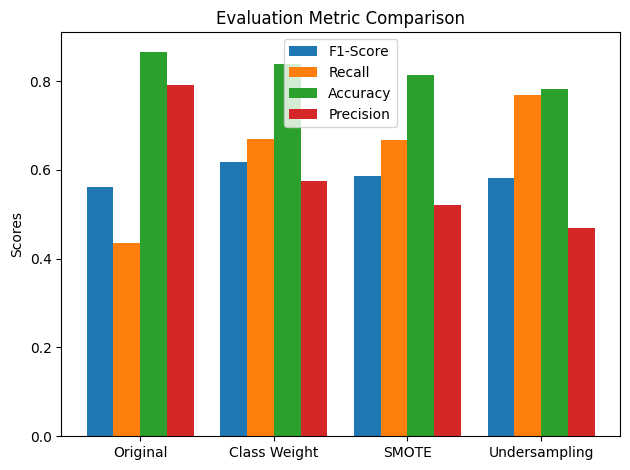

In [21]:
visualize_eval_metrics(results)

<strong>Let's train the model in logestic regression</strong>

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

## Now it is time to evaluate the model

Let's calculate aand evaluate the metrics

In [31]:
# Generate predictions using the trained model
logreg_pred = logreg.predict(X_test)

#logestic regression metrics
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)



<strong>Let's print the values for logestic regression</strong>

In [32]:
print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)

Logistic Regression Metrics:
Accuracy: 0.8005
Precision: 0.45161290322580644
Recall: 0.07124681933842239
F1 Score: 0.12307692307692307


{'Label': 'Logistic Regression', 'Accuracy': 0.8015, 'Precision': 0.46774193548387094, 'Recall': 0.0737913486005089, 'F1-Score': 0.12747252747252746, 'Confusion Matrix': array([[1574,   33],
       [ 364,   29]], dtype=int64)}


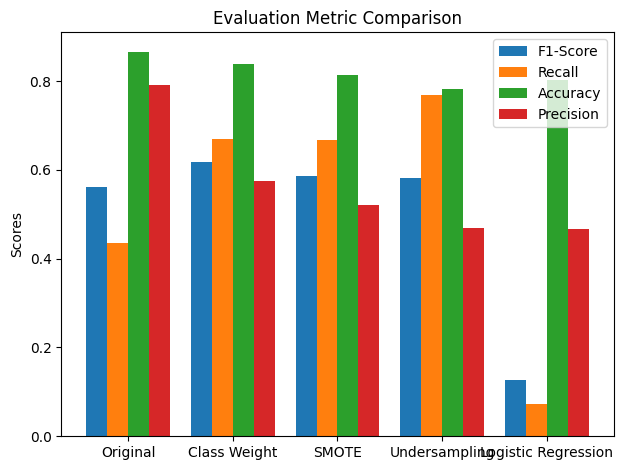

In [33]:
from sklearn.linear_model import LogisticRegression
# Example of defining best_params for logistic regression
best_params = {
    'C': 0.1,  # Example value for the regularization parameter C
    'penalty': 'l2',  # Example regularization type ('l1' or 'l2')
    'solver': 'liblinear'  # Example solver for optimization
}
# Perform logistic regression with prior parameters
logistic_model = LogisticRegression(**best_params)
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)

# Calculate evaluation metrics for logistic regression
logistic_result = evaluate(y_test, logistic_preds, "Logistic Regression")
print(logistic_result)
results.append(logistic_result)

# Visualize evaluation metrics for all models
visualize_eval_metrics(results)

### Here we can see that 'Random forest' with 'original weight' has better accuracy overall

##                   THANK YOU!